In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%autosave 60

Autosaving every 60 seconds


# DSCI 235 Final Project
### By: Blake Davis

Data Source 1: https://www.kaggle.com/datasets/aliaamiri/2020-summer-olympics-dataset?select=2020_Olympics_Dataset.csv <br>
Data Source 2: https://www.kaggle.com/datasets/rio2016/olympic-games <br>
GitHub: https://github.com/bdavis12302/2020-2016-Summer-Olympic-Data <br>

## Project Description

For this project, I am analyzing data from the Tokyo 2020 Olympics and the Rio 2016 Olympics. The Olympic Games are a fascinating event, bringing the world together to appreciate excellence in athletics. The numerous different events, countries, and people competing in the Olympic Games give ample material to analyze. Finding patterns and interesting information in this Olympic data will likely change the way I see the games in the future and make me think about the nature of sports in a new way. This project will also be challenging and allow for me to develop my communication and data wrangling skills. <br>

I am using 2 .csv files for our project. I have a main data set that is for the 2020 Summer Olympics in Tokyo. It includes data sorted by athlete name, with information on each athlete including age, country, sport, event, rank, and medal earned. The data set has multiple entries for each athlete as many athletes compete in multiple events. I have not decided how I am going to sort/filter the data for each individual athlete as they are each in the data set multiple times. I will use a 2016 Olympics in Rio De Janeiro data set to be able to determine if there were any repeat medalists and if there were more female or male medalists in 2016 vs. 2020. <br>

<hr>

I want to answer a few questions about the athletes that chose to compete in the 2016 and 2020 Summer Olympics:
1. What is the average age of an Olympic athlete in 2016? 2020? Compare.
   - Which events have a mean age greather than 30? Which events have a mean age greather than 28?<br>
6. Who are the 5 oldest athletes and who are the 5 youngest athletes in 2016 and 2020?
   - What country are they from? <br>
   - What sport do they compete in? <br>
   - What does the age distribution of their sport in 2016 and 2020 look like, if available? <br>
   - Do any of them compete in the events that tend to have younger or older competitors, respectively? <br>
5. Which Olympic athlete has the most medals in 2016? <br>
3. What are the top medaling countries in 2016? 2020? Compare.
4. Does the United States have more female or male medalists in 2020?
   - What is the average age of United States Male Medalists? Of United States Female Medalists? Of All United States Medalists?


In [2]:
olympics2020 = pd.read_csv('https://raw.githubusercontent.com/bdavis12302/2020-2016-Summer-Olympic-Data/main/SummerOlympicDatasets/2020_Olympics_Dataset.csv', encoding='latin-1')
olympics2016 = pd.read_csv('https://raw.githubusercontent.com/bdavis12302/2020-2016-Summer-Olympic-Data/main/SummerOlympicDatasets/2016_athletes.csv', encoding='latin-1')
display(olympics2016, olympics2020)

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11533,265605954,Zurian Hechavarria,CUB,female,8/10/95,1.64,58.0,athletics,0,0,0
11534,214461847,Zuzana Hejnova,CZE,female,12/19/86,1.73,63.0,athletics,0,0,0
11535,88361042,di Xiao,CHN,male,5/14/91,1.85,100.0,wrestling,0,0,0
11536,900065925,le Quoc Toan Tran,VIE,male,4/5/89,1.60,56.0,weightlifting,0,0,0


,Unnamed: 0,Code,Name,Gender,Age,NOC,Country,Discipline,Sport,Event,Rank,Medal
0,1,1346266,AALERUD Katrine,Female,26,NOR,Norway,CRD,Cycling Road,Women's Road Race,37.0,NaN
1,2,1346266,AALERUD Katrine,Female,26,NOR,Norway,CRD,Cycling Road,Women's Individual Time Trial,20.0,NaN
2,3,1355250,ABAD Nestor,Male,28,ESP,Spain,GAR,Artistic Gymnastics,Men's All-Around,NaN,NaN
3,4,1355250,ABAD Nestor,Male,28,ESP,Spain,GAR,Artistic Gymnastics,Men's Floor Exercise,NaN,NaN
4,5,1355250,ABAD Nestor,Male,28,ESP,Spain,GAR,Artistic Gymnastics,Men's Pommel Horse,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
15116,15117,1317127,ZWOLINSKA Klaudia,Female,22,POL,Poland,CSL,Canoe Slalom,Women's Kayak,5.0,NaN
15117,15118,1428770,ZYKOVA Yulia,Female,25,ROC,Russia,SHO,Shooting,50m Rifle 3 Positions Women,2.0,Silver
15118,15119,1435606,ZYUZINA Ekaterina,Female,24,ROC,Russia,SAL,Sailing,Women's One Person Dinghy - Laser Radial,27.0,NaN
15119,15120,1325697,ZYZANSKA Sylwia,Female,24,POL,Poland,ARC,Archery,Women's Individual,33.0,NaN


## *Note: The 2020 Summer Olympics were held in 2021 due to the Coronavirus Pandemic.*

## Part 1: What is the average age of an Olympic athlete in 2016? 2020? Compare

In [3]:
olympics2016.loc[8546,'dob'] = "12/25/87" #Had to Google this guy's birthday because it was missing from the dataset
startDate2016 = pd.to_datetime("08/05/16")

olympics2016['dob'] = pd.to_datetime(olympics2016['dob'])
olympics2016['dob'] = np.where(olympics2016['dob'].dt.year > 2022, olympics2016['dob'] - pd.offsets.DateOffset(years=100), olympics2016['dob'])
# For some reason unknown, python decided that 2071 was somehow in the past, so we had to force it to go to 1971
olympics2016['age'] = abs(olympics2016['dob'] - startDate2016)
olympics2016['age'] = (np.floor((olympics2016['age'].dt.days)/365)).astype(int)

In [4]:
avgAge16 = olympics2016['age'].mean()
avgAge16

26.33974692321026

In [5]:
avgAge20 = olympics2020['Age'].mean()
avgAge20

26.765227167515377

The average of an olympic athlete in the 2016 Summer Olympics and the 2020 Summer Olympics is approximately 26 years old.

### Are there events that tend to have older competitors? <br> Which events have a mean age greather than 30? Which events have a mean age greather than 28?

In [6]:
meanAgeSport2016 = olympics2016.groupby("sport")["age"].mean()
meanAgeSport2020 = olympics2020.groupby("Sport")["Age"].mean()
ageGT302016 = meanAgeSport2016[meanAgeSport2016 > 30]
ageGT302020 = meanAgeSport2020[meanAgeSport2020 > 30]
print("Sports with an average (mean) age that is greater than 30 in 2016:")
display(pd.DataFrame(ageGT302016))
print("Sports with an average (mean) age that is greater than 30 in 2020:")
display(pd.DataFrame(ageGT302020))

Sports with an average (mean) age that is greater than 30 in 2016:


,age
sport,
equestrian,37.261261
shooting,31.369231


Sports with an average (mean) age that is greater than 30 in 2020:


,Age
Sport,
Beach Volleyball,30.052083
Equestrian,38.097619
Shooting,30.097054


In [7]:
meanAgeSport2016 = olympics2016.groupby("sport")["age"].mean()
meanAgeSport2020 = olympics2020.groupby("Sport")["Age"].mean()
ageGT282016 = meanAgeSport2016[meanAgeSport2016 > 28]
ageGT282020 = meanAgeSport2020[meanAgeSport2020 > 28]
print("Sports with an average (mean) age that is greater than 28 in 2016:")
display(pd.DataFrame(ageGT282016))
print("Sports with an average (mean) age that is greater than 28 in 2020:")
display(pd.DataFrame(ageGT282020))

Sports with an average (mean) age that is greater than 28 in 2016:


,age
sport,
equestrian,37.261261
golf,29.591667
shooting,31.369231
tennis,28.066327


Sports with an average (mean) age that is greater than 28 in 2020:


,Age
Sport,
3x3 Basketball,28.437500
Baseball/Softball,29.051282
Beach Volleyball,30.052083
Cycling Mountain Bike,28.421053
Cycling Road,28.803089
Equestrian,38.097619
Fencing,28.088305
Golf,28.200000
Handball,28.649457


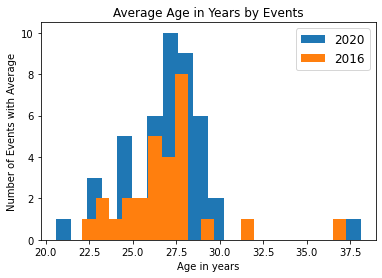

In [8]:
%matplotlib inline
num_bins=20
plt.hist(meanAgeSport2020, num_bins, label='2020')
plt.hist(meanAgeSport2016, num_bins, label='2016')
plt.title("Average Age in Years by Events")
plt.xlabel("Age in years")
plt.ylabel("Number of Events with Average")
# Graphed in this order so that the 2016 would sit on top of 2020.
plt.legend(loc='upper right', fontsize='12');

### Results:

 - The average age for the athletes competing in the 2016 and 2020 Summer Olympics is approximately 26 years of age. There are a few sports that have an average age that is a bit older. <br>

 - There are 2 sports in 2016 that have an average age of 30 and above. In 2016, the two sports are Equestrian and Shooting. There are 3 sports with an average age of 30 and above in 2020, which are Beach Volleyball, Equestrian, and Shooting. We can deduce that Equestrian and Shooting are two sports that may generally have older competitors as they have an average age of 30 or above. <br>

 - You can also see that if we look at the sports that include competitors with an average age of 28 or greater, there are a lot more events returned. This makes sense as 28 is closer to the mean age of 26, than 30. <br>
 
 - We can see from the graph above that both the 2016 and 2020 Summer Olympics both have a mean age around 26 years of age, matching what was calculated above. Both graphs are right skewed.
 
 - We can also see from the graph that a lot more events in 2020 have an average age greater than 28.

## Part 2: Who are the 5 oldest athletes and who are the 5 youngest athletes in 2020?
### What country are these athletes from?

In [9]:
olympics2016SortedByAgeNoDup = olympics2016.sort_values(by="age", ascending = True)
olympics2020SortedByAgeNoDup = olympics2020.sort_values(by="Age", ascending = True).drop_duplicates(subset=['Name'])
olympics2016Young5 = olympics2016SortedByAgeNoDup.loc[:,('name','sport','nationality','age')].head(5)
olympics2016Old5 = olympics2016SortedByAgeNoDup.loc[:,('name','sport','nationality','age')].tail(5)
olympics2020Young5 = olympics2020SortedByAgeNoDup.loc[:,('Name','Sport','Country','Age',)].head(5)
olympics2020Old5 = olympics2020SortedByAgeNoDup.loc[:,('Name','Sport','Country','Age',)].tail(5)
print("The five youngest athletes and their countries in the 2016 summer olympics are:")
display(pd.DataFrame(olympics2016Young5))
print("The five youngest athletes and their countries in the 2020 summer olympics are:")
display(pd.DataFrame(olympics2016Old5))
print("The five oldest athletes and their countries in the 2016 summer olympics are:")
display(pd.DataFrame(olympics2020Young5))
print("The five oldest athletes and their countries in the 2020 summer olympics are:")
display(pd.DataFrame(olympics2020Old5))

The five youngest athletes and their countries in the 2016 summer olympics are:


,name,sport,nationality,age
654,Ana Iulia Dascal,aquatics,ROU,13
3598,Gaurika Singh,aquatics,NEP,13
10433,Thint Myaat,aquatics,MYA,14
9918,Siri Arun Budcharern,aquatics,LAO,14
715,Anastasiya Tyurina,aquatics,TJK,14


The five youngest athletes and their countries in the 2020 summer olympics are:


,name,sport,nationality,age
10185,Suzanne Hearn,equestrian,AUS,60
6982,Mark Todd,equestrian,NZL,60
7092,Mary Hanna,equestrian,AUS,61
5045,John Whitaker,equestrian,GBR,61
5299,Julie Brougham,equestrian,NZL,62


The five oldest athletes and their countries in the 2016 summer olympics are:


,Name,Sport,Country,Age
5324,HIRAKI Kokona,Skateboarding,Japan,12
14944,ZAZA Hend,Table Tennis,Syria,12
9549,NISHIYA Momiji,Skateboarding,Japan,13
1764,BROWN Sky,Skateboarding,Great Britain,13
7294,LEAL Rayssa,Skateboarding,Brazil,13


The five oldest athletes and their countries in the 2020 summer olympics are:


,Name,Sport,Country,Age
9952,OUADDAR Abdelkebir,Equestrian,Morocco,59
10489,PINTO Carlos,Equestrian,Portugal,61
4817,GULLIKSEN Geir,Equestrian,Norway,61
5506,HOY Andrew,Equestrian,Australia,62
4980,HANNA Mary,Equestrian,Australia,66


AUS - Australia<br>
GBR -> Great Britain<br>
LAO - Laos<br>
MYA -> Myanmar<br>
NEP -> Nepal<br>
NZL -> New Zealand<br>
TJK -> Tajikistan<br>
ROU -> Romania

*Note: The country abbreviation codes are labeled/identified above for convenience.*

*Note:* These are the top 5 youngest and oldest athletes based on age and then sorted by some secondary factor. <br> I used the top 5 rows once it was sorted by age.

We can see above that these athletes, both young and old, come from a variety of different countries. We can see some patterns in the events that these athletes compete in, that is what we are going to look at next!

### Age distribution of all athletes in the 2016 and 2020 Summer Olympics.

<AxesSubplot:title={'center':'Age Dist. of athletes in 2020'}>

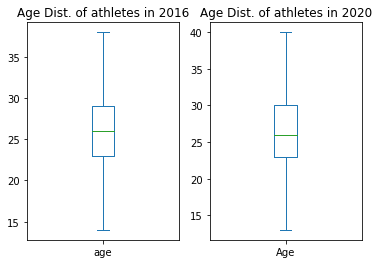

In [10]:
olympics2016AgeSorted = olympics2016SortedByAgeNoDup["age"]
plt.subplot(121)
olympics2016AgeSorted.plot.box(showfliers=False, title="Age Dist. of athletes in 2016")
plt.subplot(122)
olympics2020AgeSorted = olympics2020SortedByAgeNoDup["Age"]
olympics2020AgeSorted.plot.box(showfliers=False, title="Age Dist. of athletes in 2020")
#Outliers have been removed/filtered out

*Note: This is the same age data as graphed above without competitor duplicates and displayed in a different format in order to see a better distribution rather than just the mean (average) age for each event. Also, the outliers have been filtered out.*

### What sport do these young and old competitors compete in?

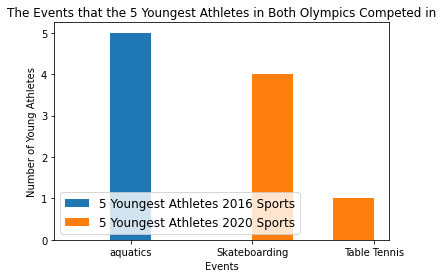

In [11]:
%matplotlib inline
num_bins=3
young2016Olympics = olympics2016Young5['sport']
young2020Olympics = olympics2020Young5['Sport']
plt.hist(young2016Olympics, num_bins, label="5 Youngest Athletes 2016 Sports")
plt.hist(young2020Olympics, num_bins, label="5 Youngest Athletes 2020 Sports")
plt.title("The Events that the 5 Youngest Athletes in Both Olympics Competed in")
plt.xlabel("Events")
plt.ylabel("Number of Young Athletes")
plt.legend(loc='lower left', fontsize='12');

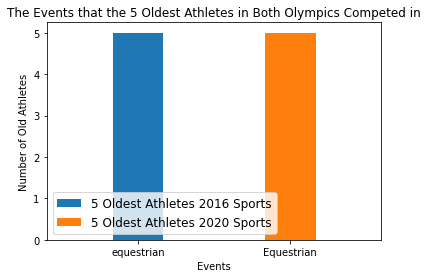

In [12]:
%matplotlib inline
num_bins=3
old2016Olympics = olympics2016Old5['sport']
old2020Olympics = olympics2020Old5['Sport']
plt.hist(old2016Olympics, num_bins, label="5 Oldest Athletes 2016 Sports")
plt.hist(old2020Olympics, num_bins, label="5 Oldest Athletes 2020 Sports")
plt.title("The Events that the 5 Oldest Athletes in Both Olympics Competed in")
plt.xlabel("Events")
plt.ylabel("Number of Old Athletes")
plt.legend(loc='lower left', fontsize='12');

We can see that the youngest athletes from 2016 competed purely in aquatics, and the youngest athletes in 2020 were competitors in Skateboarding and Table Tennis. The oldest athletes from 2016 and 2020 both competed purely as Equestrians.<br>
What does that say about the distribution of each of their sports?

 ### What does the age distribution of their sport in 2016 and 2020 look like, if available? What conclusion can we draw from that?

#### Age Distribution of Aquatic Athletes in 2016

Text(0, 0.5, 'Number of Aquatic Athletes')

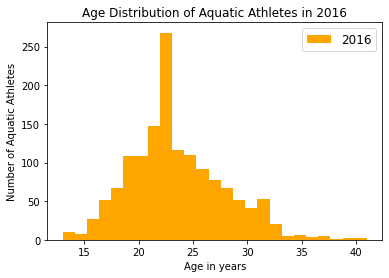

In [13]:
%matplotlib inline
num_bins=25
aquaticsAge2016 = olympics2016[olympics2016['sport'] == 'aquatics']['age']
plt.hist(aquaticsAge2016, num_bins, label="2016", color='orange')
plt.legend(loc='upper right', fontsize='12');
plt.title("Age Distribution of Aquatic Athletes in 2016")
plt.xlabel("Age in years")
plt.ylabel("Number of Aquatic Athletes")
# A lot aquatics among younger athletes

In [14]:
aquaticsAge2016.mean()

23.447750865051905

The mean age of Aquatic Athletes in 2016 is approximately 23 years old.

*Note: There is No "Aquatics" Event in 2020 as the data is Sorted Differently.*

We can see that the age distribution of aquatic athletes in 2016 is heavily right skewed and there aren't any aquatic athletes over the age of 45 in the 2016 Summer Olympics. This makes sense as all of our 5 youngest athletes in 2016 are 13 and 14 years old and compete in aquatics. The mean age for aquatic athletes in 2016 is 23 years old which is lower than the olympic athlete average age of 26 in 2016. This makes sense as the graph is heavily right skewed.

#### Age Distribution of Skate Boarders in 2020

Text(0, 0.5, 'Number of Skateboarders')

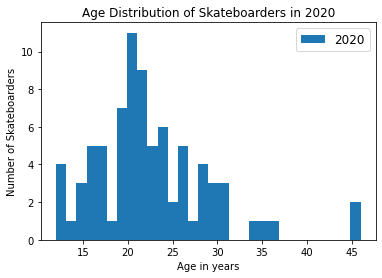

In [15]:
%matplotlib inline
num_bins=30
skateboardingAge2020 = olympics2020[olympics2020['Sport'] == 'Skateboarding']['Age']
plt.hist(skateboardingAge2020, num_bins, label="2020")
plt.legend(loc='upper right', fontsize='12');
plt.title("Age Distribution of Skateboarders in 2020")
plt.xlabel("Age in years")
plt.ylabel("Number of Skateboarders")
# A lot skateboarding among younger athletes

In [16]:
skateboardingAge2020.mean()

22.575

The mean age of Skate Boarders in 2020 is approximately 22 years old.

*Note: There is No "Skateboarding" Event in 2016 as the data is Sorted Differently.*

4 of the youngest athletes in the 2020 Summer Olympics competed in Skateboarding. Looking at the age distribution, we can see that this graph is heavily right skewed. We can also tell from the graph that there aren't very many skateboarding comepetitors, which gives us a small sample size. The mean age of Skate Boarders in the 2020 Summer Olympics is 22.575 years old. This number makes sense as the graph is right skewed. The mean could be slightly effected by the few comeptitors above the age of 45, but the mean really does demonstrate the average. <br>
__**This creates a further question of inquiry**__: What is the average age and age distribution of skateboarders in other competitions, specifically skateboarding competitions? Does it differ from the average age and age distribution of skateboarders in the 2020 Summer Olympics?

#### Age Distribution of Athletes that play Table Tennis in 2016 and 2020

Text(0, 0.5, 'Number of Athletes')

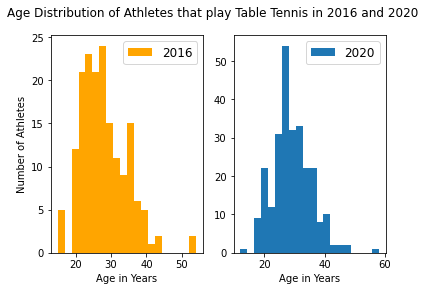

In [17]:
%matplotlib inline
num_bins=20
tableTennisAge2020 = olympics2020[olympics2020['Sport'] == 'Table Tennis']['Age']
tableTennisAge2016 = olympics2016[olympics2016['sport'] == 'table tennis']['age']
plt.subplot(122)
plt.hist(tableTennisAge2020, num_bins, label="2020")
plt.legend(loc='upper right', fontsize='12');
plt.xlabel("Age in Years")
plt.subplot(121)
plt.hist(tableTennisAge2016, num_bins, label="2016", color='orange')
plt.legend(loc='upper right', fontsize='12');
plt.suptitle("Age Distribution of Athletes that play Table Tennis in 2016 and 2020")
plt.xlabel("Age in Years")
plt.ylabel("Number of Athletes")
# The young table tennis player seems to be an outlier, cool learning from data

In [18]:
print(tableTennisAge2016.mean())
print(tableTennisAge2020.mean())

27.75581395348837
29.068441064638783


The mean age of Athletes that play Table Tennis in 2016 is approximately 28 years old.<br>
The mean age of Athletes that play Table Tennis in 2020 is approximately 29 years old.

Both, the 2016 and 2020 Summer Olympic Datasets, have Table Tennis included so we can do a direct comparison of the age distribution of the event in both olympics. We can see from both histograms that the age distribution is right skewed with a few outliers on each end of the distribution. These graphs are not as heavily right skewed as the Aquatics event from 2016 as there are no competitors over the age of 45 in that event, but table tennis still has quite a few competitors that are in the younger age bracket, making the histogram right skewed. The average age of athletes that play table tennis is closer to 30 than some of the other sports that have the younger athletes. This shows that the younger athletes in the teens range are more of an outlier and the dirstibution is closer to uniform.

#### Age Distribution of Equestrians in 2016 and 2020

Text(0, 0.5, 'Number of Athletes')

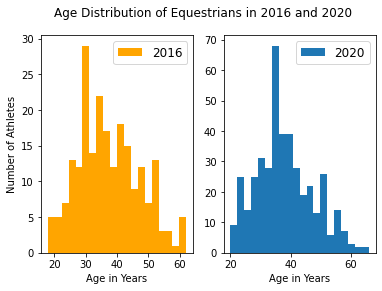

In [19]:
%matplotlib inline
num_bins=20
equestrianAge2020 = olympics2020[olympics2020['Sport'] == 'Equestrian']['Age']
equestrianAge2016 = olympics2016[olympics2016['sport'] == 'equestrian']['age']
plt.subplot(122)
plt.hist(equestrianAge2020, num_bins, label="2020")
plt.legend(loc='upper right', fontsize='12');
plt.xlabel("Age in Years")
plt.subplot(121)
plt.hist(equestrianAge2016, num_bins, label="2016", color='orange')
plt.legend(loc='upper right', fontsize='12');
plt.suptitle("Age Distribution of Equestrians in 2016 and 2020")
plt.xlabel("Age in Years")
plt.ylabel("Number of Athletes")
# Lots of Equestrians among older athletes

In [20]:
print(equestrianAge2016.mean())
print(equestrianAge2020.mean())

37.26126126126126
38.09761904761905


The mean age of Equestrians in 2016 is approximately 37 years old.<br>
The mean age of Equestrians in 2020 is approximately 38 years old.

Both, the 2016 and 2020 Summer Olympic Datasets, have Equestrian included so we can do a direct comparison of the age distribution of the event in both olympics. We can see that the age data associated with equestrians is more spread out than other sports such as aquatics or skateboarding. This means that for equestrians, it is more likely to have an older athlete competing as the distribution is closer to uniform than in the sports, like aquatics or skateboarding, where the graph is heavily right skewed because the athletes in that sport are generally younger. We can easily see that a majority of the athletes that are equestrians are quite a bit older than the average olympic athlete, especially as the mean age of an equestrian olympic athlete is approximately 38 years of age.

### Do any of the older or younger athletes compete in events that tend to have younger or older competitors, respectively?

Yes, most of these athletes compete in events that tend to have younger or older competitors, respectively. The only event that  doesn't agree with this is Table Tennis as the younger competitors in that event appear to be outliers in the data because of their distance from the mean. Most of the younger athletes, specifically the 4 competing in Skateboarding, compete in an event that is heavily right skewed. This demonstrates that this event tends to have younger athletes competing. For the older compeditors, specifically the top 5 in our data, compete in the same event, Equestrian. The Equestrian event has a different distibution than the other events we looked at because the mean age of competitors in the Equestrian event is well over the age of 30. 

### Results:

 - We can see above that these athletes, both young and old, come from a variety of different countries. <br>
 - The youngest athletes from 2016 competed purely in aquatics, and the youngest athletes in 2020 were competitors in Skateboarding and Table Tennis. The oldest athletes from 2016 and 2020 both competed purely as Equestrians. <br>
 - The age distribution of aquatic athletes in 2016 is heavily right skewed and there aren't any aquatic athletes over the age of 45 in the 2016 Summer Olympics. <br>
 - The age distribution of skate boarders in 2020 is heavily right skewed. We can tell from the graph above that there aren't very many skateboarding comepetitors, which gives us a small sample size. <br>
 - The age distribution is right skewed with a few outliers on each end of the distribution in both, 2016 and 2020. The corresponding graphs above are not as heavily right skewed as the Aquatics event from 2016 as there are no competitors over the age of 45 in that event, but table tennis still has quite a few competitors that are in the younger age bracket, making the histogram right skewed. <br>
 - The age data associated with equestrians is more spread out than other sports such as aquatics or skateboarding. This means that for equestrians, it is more likely to have an older athlete competing as the distribution is closer to uniform.

## Part 3: Which Olympic athlete has the most medals in 2016?

In [21]:
olympics2016['numMedals'] = olympics2016['gold'] + olympics2016['silver'] + olympics2016['bronze']
sortByNumMedals2016 = olympics2016.sort_values(by="numMedals", ascending = False)
sortByNumMedals2016 = sortByNumMedals2016[['name','nationality','sport','gold','silver','bronze','age','numMedals']]
topAthlete2016 = sortByNumMedals2016.head(3)
topAthlete2016

,name,nationality,sport,gold,silver,bronze,age,numMedals
7401,Michael Phelps,USA,aquatics,5,1,0,31,6
9895,Simone Biles,USA,gymnastics,4,0,1,19,5
5550,Katie Ledecky,USA,aquatics,4,1,0,19,5


### Results:

The athlete that won the most medals in 2016 was Michael Phelps with 6 medals. He was the only athlete in the 2016 Summer Olympics to earn 6 medals total.

## Part 4: What are the top 10 medaling countries in 2016? 2020? Compare.

In [22]:
pd.DataFrame(olympics2016.groupby('nationality').aggregate('sum').sort_values(by='numMedals', ascending=False)['numMedals'].head(10))

,numMedals
nationality,
USA,264
GER,160
GBR,145
RUS,115
CHN,113
FRA,95
AUS,82
ITA,72
CAN,69


In [23]:
pd.DataFrame(olympics2020.groupby('Country').aggregate('count').sort_values(by='Medal', ascending=False)['Medal'].head(10))

,Medal
Country,
United States,298
Russia,149
France,141
China,141
Great Britain,141
Japan,131
Australia,131
Canada,85
Germany,81


### Results:

Shown above are the top medaling countries in the 2016 and 2020 Summer Olympics. 
 - We can see that the United States is the top country in number of medals won in both the 2016 and 2020 Summer Olympics. <br>
 - By inspection, we can also see that the other top 9 teams are the same teams in 2016 and 2020, but just in a different order. <br>
 - **__This creates a question for further inquiry:__** How many years in the history of the summer olympics do we have these top 10 countries in the top 10? Is there something about these countries that helps them achieve this?

## Part 5: Does the United States have more female or male medalists in 2020?

Text(0.5, 0, 'Number of Athletes with that Gender')

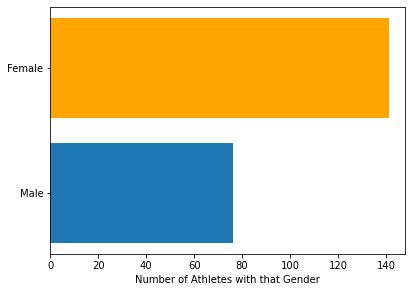

In [24]:
%matplotlib inline

usAthletes = olympics2020.loc[olympics2020['Country'] == 'United States'].drop_duplicates(subset=['Name'])
usMedalists = usAthletes.loc[pd.notna(usAthletes['Medal'])]
usMedalistsGender = usMedalists['Gender']
plt.figure(figsize=(14, 10))
plt.subplot(221)
maleUS = usMedalists[usMedalists['Gender'] == 'Male']
plt.barh("Male", maleUS['Gender'].count())
plt.subplot(221)
femaleUS = usMedalists[usMedalists['Gender'] == 'Female']
plt.barh("Female", femaleUS['Gender'].count(), color='orange')
plt.xlabel("Number of Athletes with that Gender")

In [25]:
countMale = maleUS['Name'].count()
countFemale = femaleUS['Name'].count()
totalMedalists = countMale + countFemale;
totalMedalists

217

We can clearly see that there are more female medalists than male medalists in the 2020 Summer Olympics for the United States. <br>

*Note:* I dropped the duplicates in this section because it asks if the United States has more female or male medalists, which is people, not number of medals. This is why the number of medalists doesn't match the number of medals won by the United States in 2020, simply because some compeititors won more than 1 medal.

### What is the average age of United States Male Medalists in 2020? Of United States Female Medalists? Of All United States Medalists?

In [26]:
maleUSMeanAge = maleUS['Age'].mean()
maleUSMeanAge

27.61842105263158

In [27]:
femaleUSMeanAge = femaleUS['Age'].mean()
femaleUSMeanAge

27.47517730496454

In [28]:
usMedalistsMeanAge = usMedalists['Age'].mean()
usMedalistsMeanAge

27.525345622119815

The average age of an olympic athlete that competed in the 2020 Summer Olympics was 26 years old. The average age of all United States medalists, as a total and broken up by gender was 27 years old. We can conclude that age *probably* does not have an effect on winning a medal.

<hr>


## Conclusion

After looking at the datasets for the Summer Olympics in 2016 and 2020, I can conclude that age is related to which event you compete in, but not necessarily how many medals you win or whether or not you become a medalist at all. The events in the olympics are some of the most competitive events in the world for their sport, you have to be the top of your sport to even get in. It is interesting to see that age is correlated to which sport some of these athletes compete in, but not to many other variables. There is a lot of meaningful data here and I found some meaningful results, but there are quite a few questions that could be asked about these datasets that I haven't covered.

## Future Questions of Inquiry

From above: <br>
 - What is the average age and age distribution of skateboarders in other competitions, specifically skateboarding competitions? Does it differ from the average age and age distribution of skateboarders in the 2020 Summer Olympics?
 - How many years in the history of the summer olympics do we have these top 10 countries in the top 10? Is there something about these countries that helps them achieve this?

Some more questions:
 - What is the average age of all olympic athletes that have competed in all Summer Olympics? Does it differ from what we see in  our data? If so, could we think of a reason as to why?
 - If this was done on the 2018 and 2022 Winter Olympics, would we still see events that are associated with age like we did in the 2016 and 2020 Summer Olympics?